# Box Office Prediction

Synnøve Sørensen, november 2020

## 1. Frame the problem

The goal of this assigment is to try to predict a movie's overall worldwide box office revenue. The data points provided include cast, plot keywords, budget, release dates, languages and more. The total number of features in the training set is 23, including revenue. This feature is not included when testing the model, making the total number of features 22 in the test set.

This is a regression challenge and it will be solved with SkiKit-learn machine learning library.

The notebook is dived into chapters based on these main steps:

1. Frame the problem
2. Get the data
3. Explore the data to gain insights
4. Prepare the data 
5. Explore different models 
6. Fine-tune the models
7. Present the solution
8. Launch, monitor and maintain the system

A performance measure is neccessary to determine how well the model is performing. RMSE performs very well and is generally preferred, assuming that there are few outliers (like in a bell-shaped curve). 

RMSLE is better suited if there are outliers, extreme values that deviate from other observations in the dataset. 

RMSE was chosen for solving this task, __because__

$ RMSE (X, h) = \sqrt{(\frac{1}{m})\sum_{i=1}^{m}(h(x^{i}) - y^{i})^{2}} $

- m is the number of instances in the dataset you are measuring the RMSE on. <br>
- $ x^{i} $ is a vector of all the feature values (excluding the label) of the ith instance in
the dataset, and $ y^{i} $) is its label (the desired output value for that instance).<br>
- X is a matrix containing all the feature values (excluding labels) of all instances in
the dataset.<br>
- h is your system’s prediction function, also called a hypothesis.<br>
- RMSE(X,h) is the cost function measured on the set of examples using your
hypothesis h.

## 2. Get the data

The dataset was downloaded from the Kaggle competition website. 

The dataset contains 7398 movies and a variety of metadata obtained from The Movie Database (https://www.themoviedb.org/). The training and test sets has respectively 3000 and 4398 instances each. 

### Setup


In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import ast

In [88]:
seed = 42
np.random.seed(seed)

### Data

In [3]:
import os
print(os.listdir("../box_office_data"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
movies = pd.read_csv('../box_office_data/train.csv')
test = pd.read_csv('../box_office_data/test.csv')

In [5]:
len (movies), len (test)

(3000, 4398)

In [6]:
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

There are several attributes which have instances with null values, these will be dealt with when cleaning the data set. 

There are five numeric features in the dataset. The first one is an identifier used in the database and since it will not contribute anything useful to the model it can be removed from the dataset. 

In order to work with the data sets without any concern of harming them, I'll make copies named movies_rel and test_rel that can be altered and updated when cleaning and preparing the data.

In [8]:
movies_rel = movies.drop(columns=['id'])

In [9]:
test_rel = test.drop(columns=['id'])

Let's start by taking a look at the attributes with numeric values. 

In [10]:
movies_rel.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F0B0C0430>,
      dtype=object)

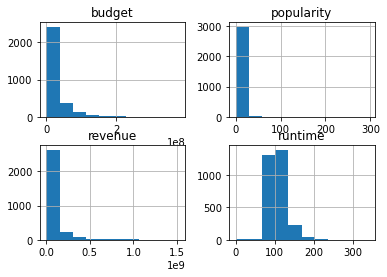

In [11]:
movies_rel.hist()

The distributions of budget, popularity and revenue have a lot more data points clustered at the low end of that scale. The values can be normalized using the logarithmic scale. This makes it easier for the models like linear regression to fit the data.

Text(0.5, 1.0, 'Distribution of popularity, logaritmic')

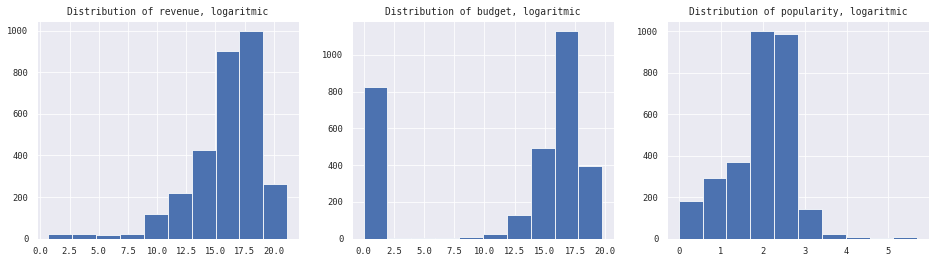

In [125]:
fig, ax = plt.subplots(figsize = (16, 4))
plt.subplot(1, 3, 1) 
plt.hist(movies_rel['revenue'].apply(np.log1p));
plt.title('Distribution of revenue, logaritmic')
plt.subplot(1, 3, 2) 
plt.hist(movies_rel['budget'].apply(np.log1p))
plt.title('Distribution of budget, logaritmic')
plt.subplot(1, 3, 3)
plt.hist(movies_rel['popularity'].apply(np.log1p));
plt.title('Distribution of popularity, logaritmic')

Budget, revenue and popularity will be changed to a logaritmic scale when training the models in section 5. 

## 3. Explore the data to gain insight

Let's have a closer look at the correlation between the features with numeric values:

In [13]:
corr_matrix = movies_rel.corr()

In [14]:
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
Name: revenue, dtype: float64

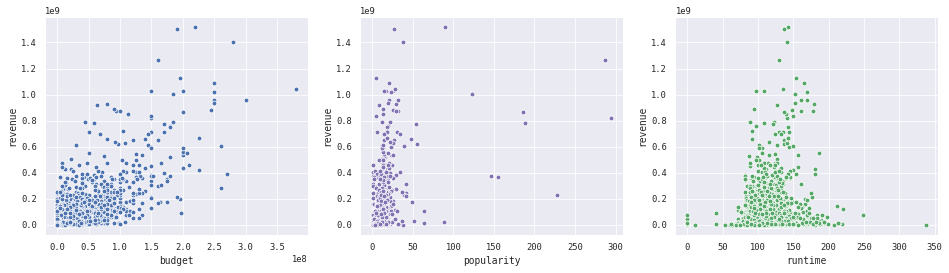

In [16]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='budget', y='revenue', data = movies_rel, color='b')
plt.subplot(1, 3, 2)
sns.scatterplot(x='popularity', y='revenue', data = movies_rel, color='m')
plt.subplot(1, 3, 3)
sns.scatterplot(x='runtime', y='revenue', data = movies_rel, color='g')

As expected, there is a good correlation between a movie's budget and it's revenue. There is a moderate correlation between popularity and revenue, and a weak correlation between runtime and revenue. This is often easier to visualize with a heatmap:

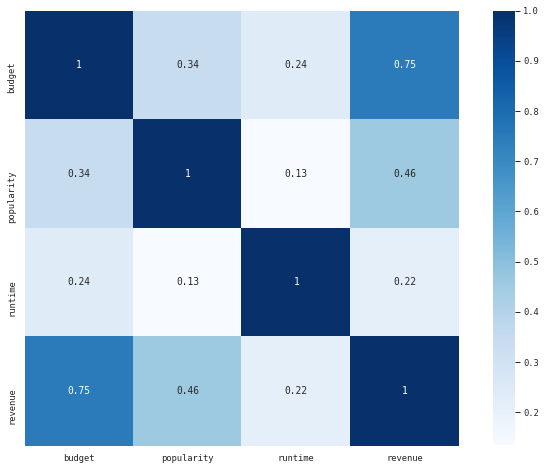

In [15]:
sns.set(context="paper",font="monospace")
fig, axe = plt.subplots(figsize=(12,8))
cmap = 'Blues'
sns.heatmap(corr_matrix,vmax=1,square =True, cmap=cmap,annot=True )


## 4. Prepare the data

### Data cleaning

Most algorithms cannot work with missing values. It is a common practise to compute the median values and fill them in where values are missing in the training set. This method will be used to fill in missing values for the features that has numeric values. In this case the only feature with missing numeric values is runtime. 

Many of the features has values that are objects. There are different options regarding how to extract information that the models can use from these objects. Some of these objects, for example the homepage of a movie, can be treated as a boolean value. One can look for correlations between revenue and whether or not a movie has a homepage. 

Features like genres and spoken languages can be counted. Is there a correlation between revenue and how many genres a movies is associated with? Does revenue go up when there is more than one language being spoken in the movie? 

It is also possible to extract all genres and transform them to boolean values, this can be done with One Hot Encoder. By doing this the dataset will have a feature for each genre and the values will be 0 or 1 (false or true). 

After adding new attributes to the dataset, the original attributes and their object values can be dropped.

In order to keep the assignment within a reasonable size, some features will be dropped. These features include id, IMDB id, overview, poster path, production companies, production countries, status, keywords and crew.

#### Runtime

In [17]:
movies_rel['runtime'].fillna((movies_rel['runtime'].mean()), inplace=True)

In [18]:
movies_rel['runtime'].isnull().sum()

0

#### Movie collections

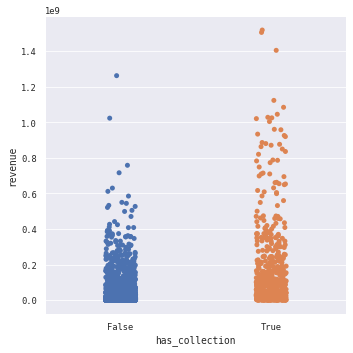

In [20]:
movies_rel['has_collection'] = movies_rel['belongs_to_collection'].notnull()
sns.catplot(x = 'has_collection', y = 'revenue', data = movies_rel)

The plot indicates that movies that are a part of a collection has a total revenue that is higher than the total revenue of movies that are not part of a collection. There might be a correlation between revenue and movie collections, and this new feature will be added to the dataset. 

The following features will be handled the same way: homepage, tagline and title vs. original title. These features will be added to the dataset as a boolean value.

#### Homepage

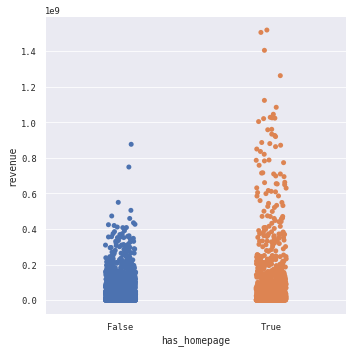

In [21]:
movies_rel['has_homepage'] = movies_rel['homepage'].notnull()
sns.catplot(x = 'has_homepage', y = 'revenue', data = movies_rel)

#### Tagline

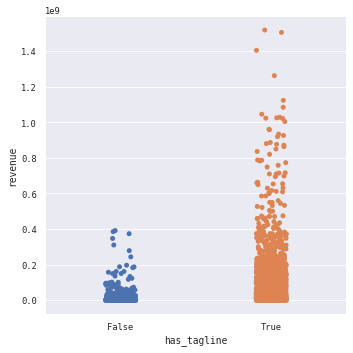

In [22]:
movies_rel['has_tagline'] = movies_rel['tagline'].notnull()
sns.catplot(x = 'has_tagline', y = 'revenue', data = movies_rel)

#### Title vs. original title

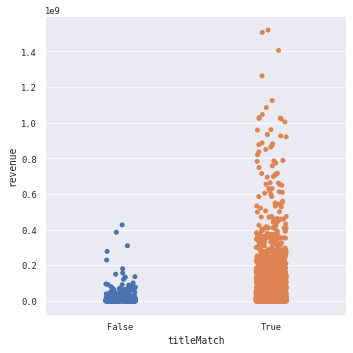

In [23]:
movies_rel['titleMatch'] = movies_rel['title'] == movies_rel['original_title']
sns.catplot(x = 'titleMatch', y = 'revenue', data = movies_rel)

#### Release dates

In order to look for correlations between revenue and release dates, the release dates will be split into days, months and years. 

The following plots show the correlations between revenue and day, monts and year. It is easy to see that newer movies is accosiated with higher revenues. There might be more than one reason for this, inflation being the top contender. To make sure that the acheivements of older movies are not eroded, a feature for inflated revenue needs to be added to the dataset.  

In [24]:
def trans_release_date(data):
    data[['release_month','release_day','release_year']]=data['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    data['release_year'] = data['release_year']
    data.loc[ (data['release_year'] <= 18) & (data['release_year'] < 100), "release_year"] += 2000
    data.loc[ (data['release_year'] > 18)  & (data['release_year'] < 100), "release_year"] += 1900
    
    return data

In [25]:
movies_rel = trans_release_date(movies_rel)

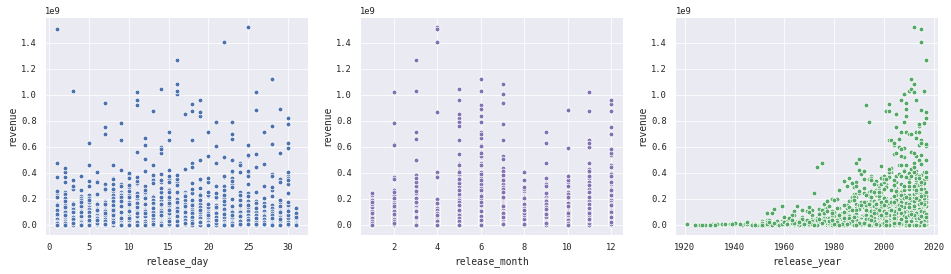

In [26]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='release_day', y='revenue', data = movies_rel, color='b')
plt.subplot(1, 3, 2)
sns.scatterplot(x='release_month', y='revenue', data = movies_rel, color='m')
plt.subplot(1, 3, 3)
sns.scatterplot(x='release_year', y='revenue', data = movies_rel, color='g')

#### Inflated revenue

#### Languages

There are several ways to extract information from the language features. In order to keep the assignment within a reasonable size, original language will be handled as a boolean for English.

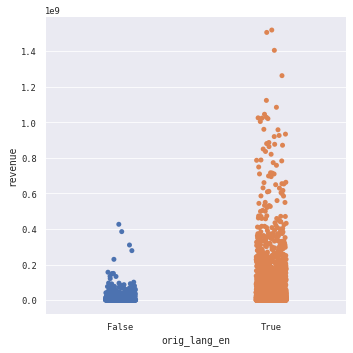

In [27]:
movies_rel['orig_lang_en'] = movies_rel['original_language'] == 'en'
sns.catplot(x = 'orig_lang_en', y = 'revenue', data = movies_rel)

The spoken languages will be handles as a count of how many languages that are spoken in each movie.
The values for spoken languages is a dictionary with keys for ISO  name codes and name of the language. The corresponding values consist of a language code and the language represented as a string. A lambda function is used to extract the ISO name codes for each film and then count how many languages are spoken in each film. 

In [28]:
movies_rel['spoken_languages'].head(20)

0              [{'iso_639_1': 'en', 'name': 'English'}]
1              [{'iso_639_1': 'en', 'name': 'English'}]
2              [{'iso_639_1': 'en', 'name': 'English'}]
3     [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4              [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5              [{'iso_639_1': 'en', 'name': 'English'}]
6              [{'iso_639_1': 'en', 'name': 'English'}]
7     [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...
8              [{'iso_639_1': 'en', 'name': 'English'}]
9              [{'iso_639_1': 'en', 'name': 'English'}]
10             [{'iso_639_1': 'en', 'name': 'English'}]
11             [{'iso_639_1': 'en', 'name': 'English'}]
12             [{'iso_639_1': 'en', 'name': 'English'}]
13    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
14    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
15              [{'iso_639_1': 'sr', 'name': 'Srpski'}]
16    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
17             [{'iso_639_1': 'en', 'name': 'Eng

In [29]:
movies_rel['spoken_languages'] = movies_rel['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
movies_rel['no_languages'] = movies_rel['spoken_languages'].apply(lambda x: len(x))

In [30]:
movies_rel.loc[:, ['spoken_languages', 'no_languages']]

,spoken_languages,no_languages
0,[en],1
1,[en],1
2,[en],1
3,"[en, hi]",2
4,[ko],1
...,...,...
2995,[en],1
2996,[sv],1
2997,[en],1
2998,[en],1


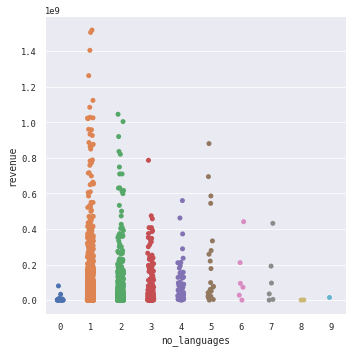

In [31]:
sns.catplot(x = 'no_languages', y = 'revenue', data = movies_rel)

#### Genres

The genre values for each film are dictionaries of genre id and genre names. A lambda function is used to extract the genre names and quantities associated with each film. 

In [32]:
movies_rel['genres'].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [33]:
movies_rel['genres'] = movies_rel['genres'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
movies_rel['no_genres'] = movies_rel['genres'].apply(lambda x: len(x))

In [34]:
movies_rel.loc[:, ['genres', 'no_genres']]

,genres,no_genres
0,[Comedy],1
1,"[Comedy, Drama, Family, Romance]",4
2,[Drama],1
3,"[Thriller, Drama]",2
4,"[Action, Thriller]",2
...,...,...
2995,"[Comedy, Romance]",2
2996,"[Drama, Music]",2
2997,"[Crime, Action, Mystery, Thriller]",4
2998,"[Comedy, Romance]",2


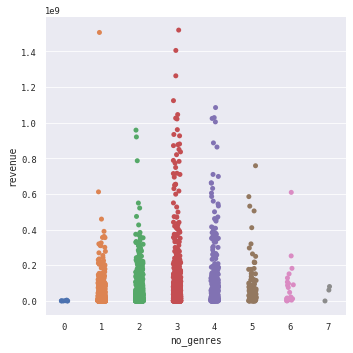

In [35]:
sns.catplot(x = 'no_genres', y = 'revenue', data = movies_rel)

#### Cast

There is probably a strong correlation between revenue and certain actors. __But ...__ 

In [36]:
movies_rel['cast_names'] = movies_rel['cast'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))
movies_rel['no_cast'] = movies_rel['cast_names'].apply(lambda x: len(x))

In [37]:
movies_rel.loc[:, ['cast_names', 'no_cast']]

,cast_names,no_cast
0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",24
1,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",20
2,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",51
3,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",7
4,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",4
...,...,...
2995,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...",15
2996,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...",11
2997,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...",15
2998,"[Ben Stiller, Jennifer Aniston, Philip Seymour...",26


### Pipeline for data cleaning

In [38]:
def pipeline(dataset):
    data_rel = dataset.filter(['belongs_to_collection', 'budget', 'genres', 'homepage', 'original_language', 'original_title', 'popularity', 'release_date', 'runtime', 'spoken_languages', 'tagline', 'title', 'revenue'])
    data_rel['runtime'] = dataset['runtime'].fillna(dataset['runtime'].mean())
    data_rel['has_collection'] = dataset['belongs_to_collection'].notnull()
    data_rel['has_homepage'] = dataset['homepage'].notnull()
    data_rel['has_tagline'] = dataset['tagline'].notnull()
    data_rel['titleMatch'] = dataset['title'] == dataset['original_title']
    trans_release_date(data_rel)
    data_rel['orig_lang_en'] = dataset['original_language'] == 'en'
    
    data_rel['spoken_languages'] = dataset['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
    data_rel['no_languages'] = data_rel['spoken_languages'].apply(lambda x: len(x))
    
    data_rel['genres'] = dataset['genres'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
    data_rel['no_genres'] = data_rel['genres'].apply(lambda x: len(x))
    
    data_rel['cast_names'] = dataset['cast'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else []))
    data_rel['no_cast'] = data_rel['cast_names'].apply(lambda x: len(x))
    
    data_rel = data_rel.select_dtypes(exclude=['object'])
    return data_rel

In [39]:
movies_prep = pipeline(movies)

In [40]:
movies_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3000 non-null   int64  
 1   popularity      3000 non-null   float64
 2   runtime         3000 non-null   float64
 3   revenue         3000 non-null   int64  
 4   has_collection  3000 non-null   bool   
 5   has_homepage    3000 non-null   bool   
 6   has_tagline     3000 non-null   bool   
 7   titleMatch      3000 non-null   bool   
 8   release_month   3000 non-null   int32  
 9   release_day     3000 non-null   int32  
 10  release_year    3000 non-null   int32  
 11  orig_lang_en    3000 non-null   bool   
 12  no_languages    3000 non-null   int64  
 13  no_genres       3000 non-null   int64  
 14  no_cast         3000 non-null   int64  
dtypes: bool(5), float64(2), int32(3), int64(5)
memory usage: 214.0 KB


In [41]:
movies_prep.head(10)

,budget,popularity,runtime,revenue,has_collection,has_homepage,has_tagline,titleMatch,release_month,release_day,release_year,orig_lang_en,no_languages,no_genres,no_cast
0,14000000,6.575393,93.0,12314651,True,False,True,True,2,20,2015,True,1,1,24
1,40000000,8.248895,113.0,95149435,True,False,True,True,8,6,2004,True,1,4,20
2,3300000,64.299990,105.0,13092000,False,True,True,True,10,10,2014,True,1,1,51
3,1200000,3.174936,122.0,16000000,False,True,False,True,3,9,2012,False,2,2,7
4,0,1.148070,118.0,3923970,False,False,False,False,2,5,2009,False,1,2,4
5,8000000,0.743274,83.0,3261638,False,False,False,True,8,6,1987,True,1,3,4
6,14000000,7.286477,92.0,85446075,False,True,True,True,8,30,2012,True,1,2,14
7,0,1.949044,84.0,2586511,False,False,True,True,1,15,2004,True,2,1,4
8,0,6.902423,100.0,34327391,True,False,True,True,2,16,1996,True,1,5,12
9,6000000,4.672036,91.0,18750246,False,False,True,True,4,16,2003,True,1,2,20


In [42]:
corr_matrix = movies_prep.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue           1.000000
budget            0.752965
popularity        0.461460
has_collection    0.339425
no_cast           0.335737
has_homepage      0.263179
runtime           0.216363
has_tagline       0.180366
no_genres         0.163654
orig_lang_en      0.142130
release_year      0.137933
titleMatch        0.123204
no_languages      0.064961
release_day       0.045699
release_month     0.020164
Name: revenue, dtype: float64

After handling object datatypes and dropping some features all together, the dataset consist of 13 features, not counting the revenue. There are a lot more work that can be done to the dataset, but this simplistic version will be used to train a  model. 

# 5. Explore different models

The skewed features budget and revenue need to be normalized by algorithm. The training data (X) will be stored in data_prepared, and the labels (y) will be stored in data_labels. 

In [127]:
data_labels = movies['revenue']
data_prepared = pipeline(movies)
data_prepared.drop('revenue',axis=1, inplace=True)
data_prepared.info()
data_prepared['budget'] = np.log1p(data_prepared['budget'])
data_prepared['popularity'] = np.log1p(data_prepared['popularity'])
data_labels_log = np.log1p(data_labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3000 non-null   int64  
 1   popularity      3000 non-null   float64
 2   runtime         3000 non-null   float64
 3   has_collection  3000 non-null   bool   
 4   has_homepage    3000 non-null   bool   
 5   has_tagline     3000 non-null   bool   
 6   titleMatch      3000 non-null   bool   
 7   release_month   3000 non-null   int32  
 8   release_day     3000 non-null   int32  
 9   release_year    3000 non-null   int32  
 10  orig_lang_en    3000 non-null   bool   
 11  no_languages    3000 non-null   int64  
 12  no_genres       3000 non-null   int64  
 13  no_cast         3000 non-null   int64  
dtypes: bool(5), float64(2), int32(3), int64(4)
memory usage: 190.6 KB


#### Displaying scores

In [128]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

#### Linear regressor

In [129]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels_log)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [2.35259627 2.51962431 2.35144946 2.47847289 2.06407081 2.7176309
 2.58436775 2.13957562 2.16069584 2.46889813 2.15182874 2.52332319
 2.32991382 2.00779903 2.0066179 ]
Mean:  2.323790977354082
Standard deviation:  0.21691769644437378


#### Random forest regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=120, random_state=seed)

In [132]:
rf_scores = cross_val_score(rf_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores:  [2.15982941 2.38776652 2.2588913  2.3057158  1.9959781  2.61504302
 2.28167264 1.92210902 2.03619605 2.22424378 1.8893089  2.23391175
 2.21220334 2.00379953 2.03320536]
Mean:  2.1706583021628414
Standard deviation:  0.18760629832321896


#### Decision tree and Ada boost regressor

In [133]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=1, random_state=seed)
dt_reg.fit(data_prepared, data_labels_log)

DecisionTreeRegressor(max_depth=1, random_state=42)

In [134]:
dt_scores = cross_val_score(dt_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
dt_rmse_scores = np.sqrt(-dt_scores)
display_scores(dt_rmse_scores)

Scores:  [2.61838863 2.90834277 2.69012056 2.67650748 2.32694911 2.94127094
 2.78692063 2.31699656 2.49126918 2.87923482 2.42107881 2.75795374
 2.52838262 2.16704753 2.26360775]
Mean:  2.584938074359944
Standard deviation:  0.24007384879317836


In [135]:
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1), n_estimators=120, random_state=seed)
ada_reg.fit(data_prepared, data_labels_log)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=120, random_state=42)

In [136]:
ada_scores = cross_val_score(ada_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
ada_rmse_scores = np.sqrt(-ada_scores)
display_scores(ada_rmse_scores)

Scores:  [2.54065792 2.81255533 2.5256387  2.70717027 2.53602238 2.85169205
 2.71839039 2.34030068 2.36917008 2.66271522 2.28279197 2.67986024
 2.74450219 2.24004151 2.18218822]
Mean:  2.546246477760683
Standard deviation:  0.2098425863284577


#### Gradient Boosting regressor

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=seed)
gb_reg.fit(data_prepared, data_labels_log)

GradientBoostingRegressor(random_state=42)

In [138]:
gb_scores = cross_val_score(gb_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
gb_rmse_scores = np.sqrt(-gb_scores)
display_scores(gb_rmse_scores)

Scores:  [2.13986915 2.4158547  2.25968038 2.2633587  1.9056665  2.53637827
 2.28319956 1.86808133 1.88450811 2.05524346 1.84931061 2.1938229
 2.16263491 1.89706362 1.8872093 ]
Mean:  2.106792101044711
Standard deviation:  0.21273763020759456


#### XGBoost

In [139]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(data_prepared, data_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
xgb_scores = cross_val_score(xgb_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores:  [2.33100469 2.51086934 2.35387627 2.24372282 1.98782445 2.53062466
 2.34867453 2.08374718 2.14820014 2.00044945 2.05689665 2.24756995
 2.29248136 2.03010083 2.1879862 ]
Mean:  2.2236019001753733
Standard deviation:  0.1680860413701169


#### Voting regressor

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.<br><br>
Ensemble methods, like the voting regressor, works best when the predictors are diverse, ie trained with different algorithms. Because this increases the chance that they will make very different types of errors, the ensemble's accuracy is improved. 

In [141]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor(estimators=[('randfor', rf_reg), ('gradbost', gb_reg), ('xgb', xgb_reg), ('ada', ada_reg), ('lin', lin_reg)])
vot_reg.fit(data_prepared, data_labels_log)

VotingRegressor(estimators=[('randfor',
                             RandomForestRegressor(n_estimators=120,
                                                   random_state=42)),
                            ('gradbost',
                             GradientBoostingRegressor(random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.3000...
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                         

In [142]:
vot_scores = cross_val_score(vot_reg, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
vot_rmse_scores = np.sqrt(-vot_scores)
display_scores(vot_rmse_scores)

Scores:  [2.17070664 2.40795103 2.23956477 2.25306317 1.95425499 2.52572608
 2.30199364 1.9084955  1.97426692 2.13814446 1.87620469 2.26190736
 2.20050001 1.88000377 1.90037542]
Mean:  2.132877230398813
Standard deviation:  0.19973259706043597


The voting regressor has a higher RMSE score than Gradient Boosting. 

The voting ensemble is not guaranteed to provide better performance than any single model used in the ensemble. Since Gradient Boosting performed better than the voting ensemble, it will be used instead of the voting ensemble.

## 6. Fine-tune the models 

### Grid search

Instead of manually changing the hyperparameters until finding a great combination, one option is to perform a grid search. This method uses cross-validation to evaluate possible combinations of selected hyperparameters values.<br><br>
Gradient boosting performed best in the previous section and will be chosen for fine-tuning.

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[10,100,1000], 
     'learning_rate':[0.15,0.1,0.05], 
     'max_features': [2,3,4],
     'max_depth':[2,4,8], 
     #'max_leaf_nodes':[5,20],
}]

grid_search = GridSearchCV(gb_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels_log)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.15, 0.1, 0.05],
                          'max_depth': [2, 4, 8], 'max_features': [2, 3, 4],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [144]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': 4,
 'n_estimators': 1000}

In [167]:
gb_best = GradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_features=4, n_estimators=1000)
gb_best.fit(data_prepared, data_labels_log)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_features=4,
                          n_estimators=1000)

In [169]:
test_prepared = pipeline(test)
test_prepared['budget'] = np.log1p(test_prepared['budget'])
test_prepared['popularity'] = np.log1p(test_prepared['popularity'])

final_prediction = gb_best.predict(test_prepared)
final_prediction

array([14.66745662, 14.40525325, 15.0446472 , ..., 17.6878332 ,
       15.23062747, 13.26874314])

In [170]:
scores = cross_val_score(gb_best, data_prepared, data_labels_log, scoring="neg_mean_squared_error", cv=15)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores:  [2.21482671 2.37382429 2.26005227 2.18716573 1.97599151 2.40777268
 2.18166744 1.95892981 1.89130375 2.15620592 1.785207   2.1595468
 2.16074098 1.97290265 1.87370064]
Mean:  2.1039892117817742
Standard deviation:  0.1785537432023775


__The mean RMSE is the same as before fine-tuning. Not much help in fine-tuning?__

## 7. Present the solution

RMSLE score at Kaggle: 2.09.

In [171]:
final_pred_norm = np.exp(final_prediction)
final_pred_norm

array([ 2344204.3776861 ,  1803524.28967529,  3418277.07934749, ...,
       48053868.48538119,  4116967.74246227,   578817.8675291 ])

In [172]:
np.mean(final_pred_norm)

54138254.09482281

In [173]:
result = pd.DataFrame(final_pred_norm)
result.columns = ['revenue']
result.index = test['id']
result.to_csv('./data/submission_box_office.csv')
len(result)

4398

In [174]:
result.head(10)

,revenue
id,
3001,2.344204e+06
3002,1.803524e+06
3003,3.418277e+06
3004,7.962947e+06
3005,9.905685e+05
3006,1.857461e+06
3007,1.794535e+06
3008,1.757078e+07
3009,2.629925e+07


## 8. Launch, monitor and maintain the system